**MSSV:** 19520007   
**Họ tên:** Võ Khánh An   
**Bài tập:** Edge Detection


# Kết nối đến Google Drive

In [1]:
from google.colab import drive 
drive.mount('/gdrive')

Mounted at /gdrive


In [6]:
import os
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.spatial import distance

In [7]:
dir_monhoc = "/gdrive/MyDrive/COURSES/CS231.L22.KHCL"
dir_baitap = os.path.join(dir_monhoc, 'EdgeDetection')

# Bộ lọc dò tìm cạnh ảnh

In [10]:
path_filename = os.path.join(dir_baitap, 'particles.bmp')
img = cv.imread(path_filename, 0)

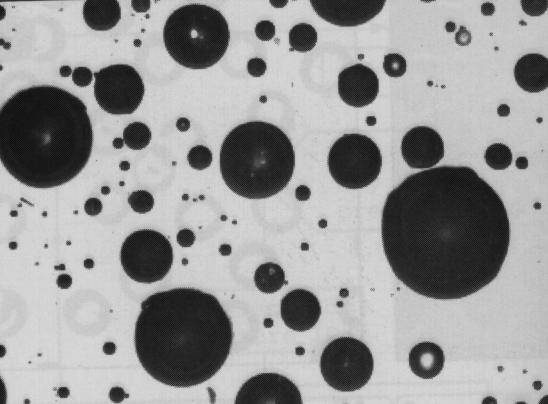

In [13]:
cv2_imshow(img)

In [42]:
kernels_gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Gx1 = cv.filter2D(img, -1, kernels_gx)
Gx2 = cv.filter2D(img, -1, -kernels_gx)
kernels_gy = np. array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
Gy1 = cv.filter2D(img, -1, kernels_gy)
Gy2 = cv.filter2D(img, -1, -kernels_gy)

G = np.sqrt(np.square(Gx1 * 1.0) + np.square(Gy1 * 1.0) + np.square(Gx2 * 1.0) + np.square(Gy2 * 1.0))

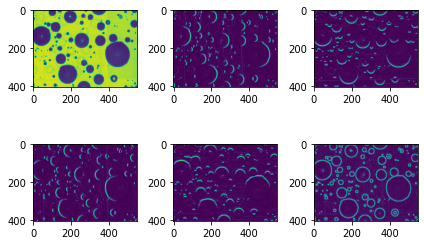

In [49]:
images = [img, Gx1, Gy1, Gx2, Gy2, G]
width = 64
height = 64
rows = 2
cols = 3
axes = []
fig = plt.figure()

for i in range(6):
    image = images[i]
    axes.append(fig.add_subplot(rows, cols, i+1) )
    plt.imshow(image)
fig.tight_layout()    
plt.show()

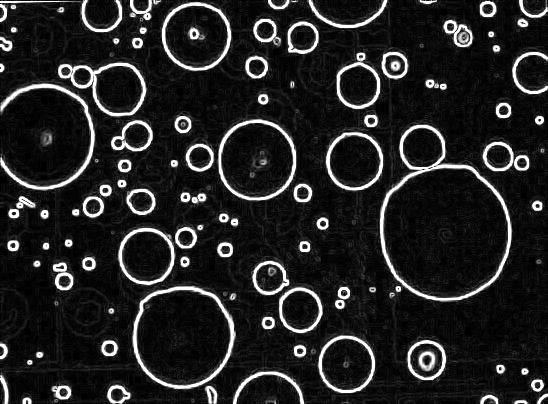

In [44]:
cv2_imshow(G)

# Bộ lọc làm trơn ảnh

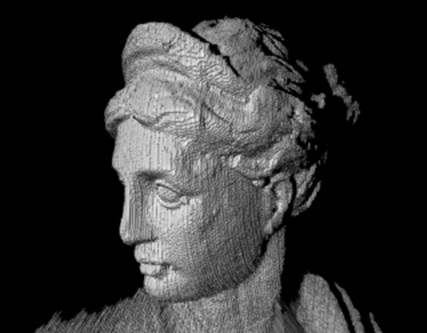

In [56]:
path_filename = os.path.join(dir_baitap, 'RawData.jpg')
img2 = cv.imread(path_filename, 0)
cv2_imshow(img2)

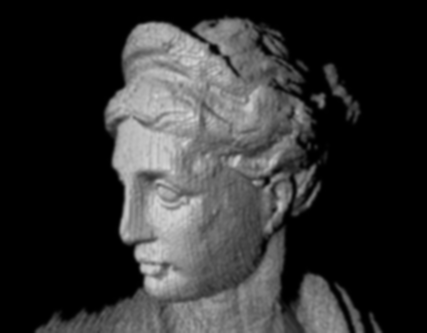

In [92]:
L1 = np.ones((3, 3)) / 9
G = cv.filter2D(img2, -1, L1)
G = cv.filter2D(G, -1, L1)
# G = cv.filter2D(G, -1, L1)
# S2 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
# G = cv.filter2D(G, -1, S2)
cv2_imshow(G)

# Bộ lọc làm sắc ảnh

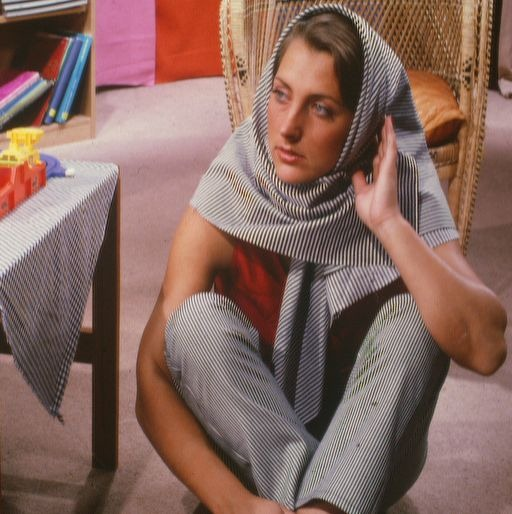

In [74]:
path_filename = os.path.join(dir_baitap, 'barbara.jpg')
img3 = cv.imread(path_filename)
cv2_imshow(img3)

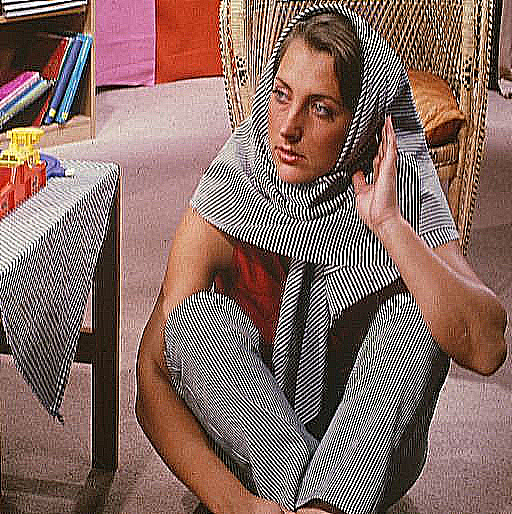

In [81]:
S2 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
# S2 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

G = cv.filter2D(img3, -1, S2)
cv2_imshow(G)